In [28]:
states = [1, 0] #1 being cooperating, 0 being defecting

defectorUtility = -0.5 
 
politicalClimate=0.2 #Being environment-positive -- Adding some random number being events in life lik emovies etc.


class Agent:
    def __init__(self, state):
        self.state = state
    
    def consider(self, neighbour):
        
        neighboursWeight = 0.4 # or adding randomness here
        
        weight = self.state + politicalClimate + defectorUtility + neighboursWeight*neighbour.state
        
        if(weight > 0):
            self.state = 1
        else:
            self.state = 0

In [29]:
from numpy.random import choice
import random

class Model:
    def __init__(self):
        self.agents = [] #Add topology - and add some random people far in the network from time to time, changing the network
        #Time dependent topology

    def addAgent(self, agent):
        self.agents.append(agent)
    
    def interact(self):
        i = random.randint(0, len(self.agents) - 1) # phyton counts from 0, so pop(8) is an error
        j = random.randint(0, len(self.agents) - 1)
    
        while i == j:
            j = random.randint(0, len(self.agents) - 1) # make sure the same agent is not selected twice
        
        self.agents[i].consider(self.agents[j])
        
    def printModel(self):
        count = 0
        for agent in self.agents:
            count += agent.state
        print(count)
        

In [39]:
import networkx as nx

def makeGridModel(n):
    model = Model()
    G = nx.Graph()
    agents = [[0] * n for r in range(n)]
    for i in range(n):
        for j in range (n):
            agent1 = Agent(random.randint(0,1))
            model.addAgent(agent1)
            agents[i][j] = agent1
            if(i!=0):
                G.add_edge(agent1, agents[i-1][j])
            if(j!=0):
                G.add_edge(agent1, agents[i][j-1])
    
    return (model, G)

In [11]:
def simulate(n, k):
    model = makeModel(n)
    model.printModel()
    for i in range(k):
        model.interact()
    model.printModel()

In [12]:
simulate(100, 1000)

44
100


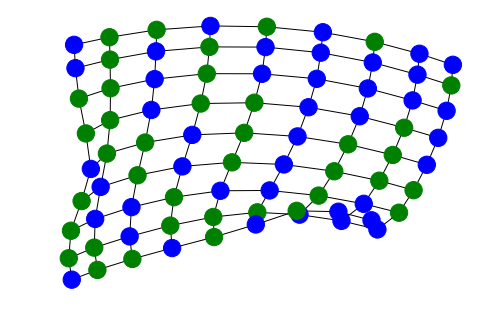

In [45]:
import matplotlib.pyplot as plt

(model, G) = makeGridModel(9)

color_map = []
for node in G:
    if node.state== 1:
        color_map.append('blue')
    else: color_map.append('green')   

nx.draw(G, node_color = color_map,)
